In [ ]:
!pip install seaborn
!pip install seaborn --upgrade
!pip install numpy
!pip install scikit-learn
!pip install pandas
!pip install formulaic
!pip install gapminder

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

from formulaic import Formula, model_matrix
from gapminder import gapminder

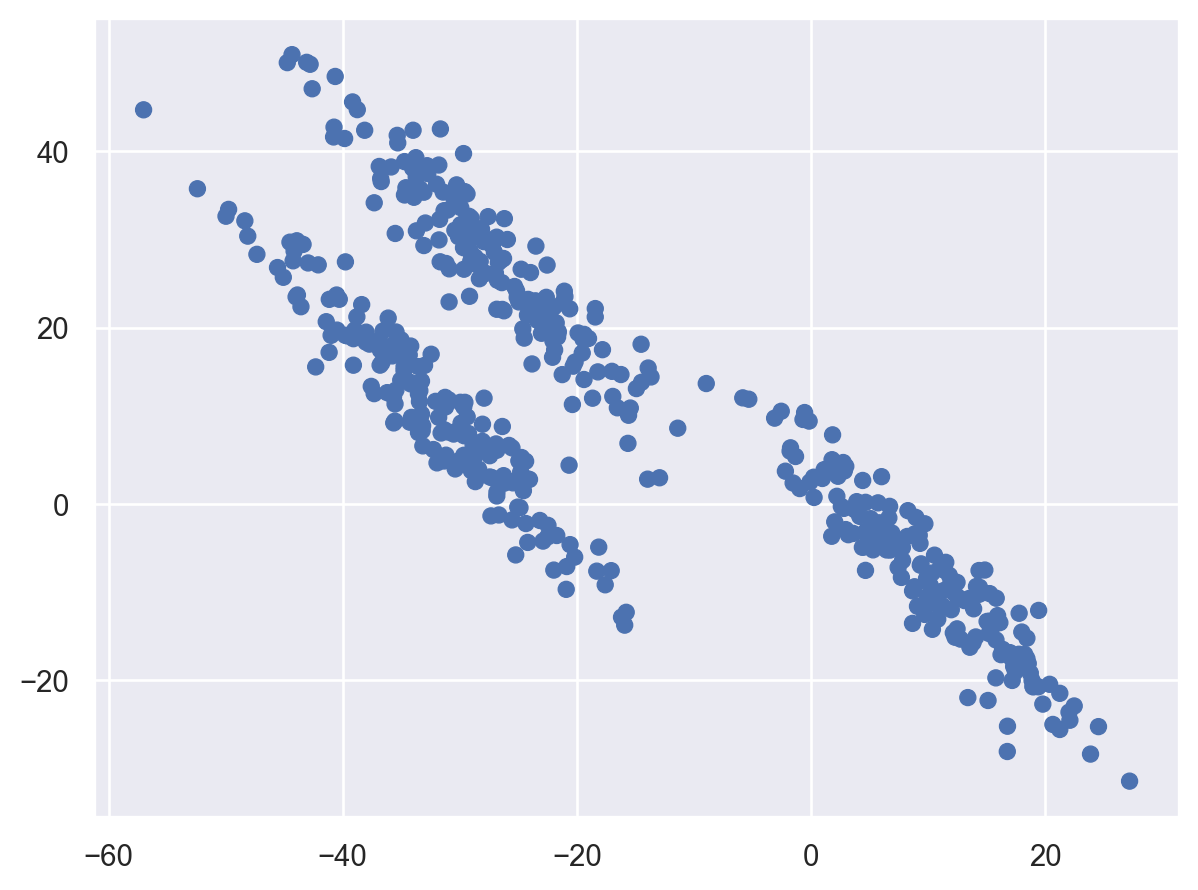

In [2]:
import seaborn.objects as so
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=500, random_state=170)
transformation = [[6., -6.], [-4., 8.]]
X_aniso = np.dot(X, transformation)

so.Plot(x = X_aniso[:,0], y = X_aniso[:,1]).add(so.Dot())

In [5]:
clustering = DBSCAN(eps = 5, min_samples= 5)

etiquetas = clustering.fit_predict(X_aniso)

(
    so.Plot(x = X_aniso[:,0], y = X_aniso[:,1], color = etiquetas.astype(str))
    .add(so.Dot())
)

outliers = 0
for valor in etiquetas:
    if valor == -1:
        outliers +=1

outliers

1

In [6]:
lambdas = [12,8,7,4,3]

total = 12+8+7+4+3

porcentaje = 0

for autovalor in lambdas:

    porcentaje += autovalor / total
    print (porcentaje)

0.35294117647058826
0.5882352941176471
0.7941176470588236
0.911764705882353
1.0


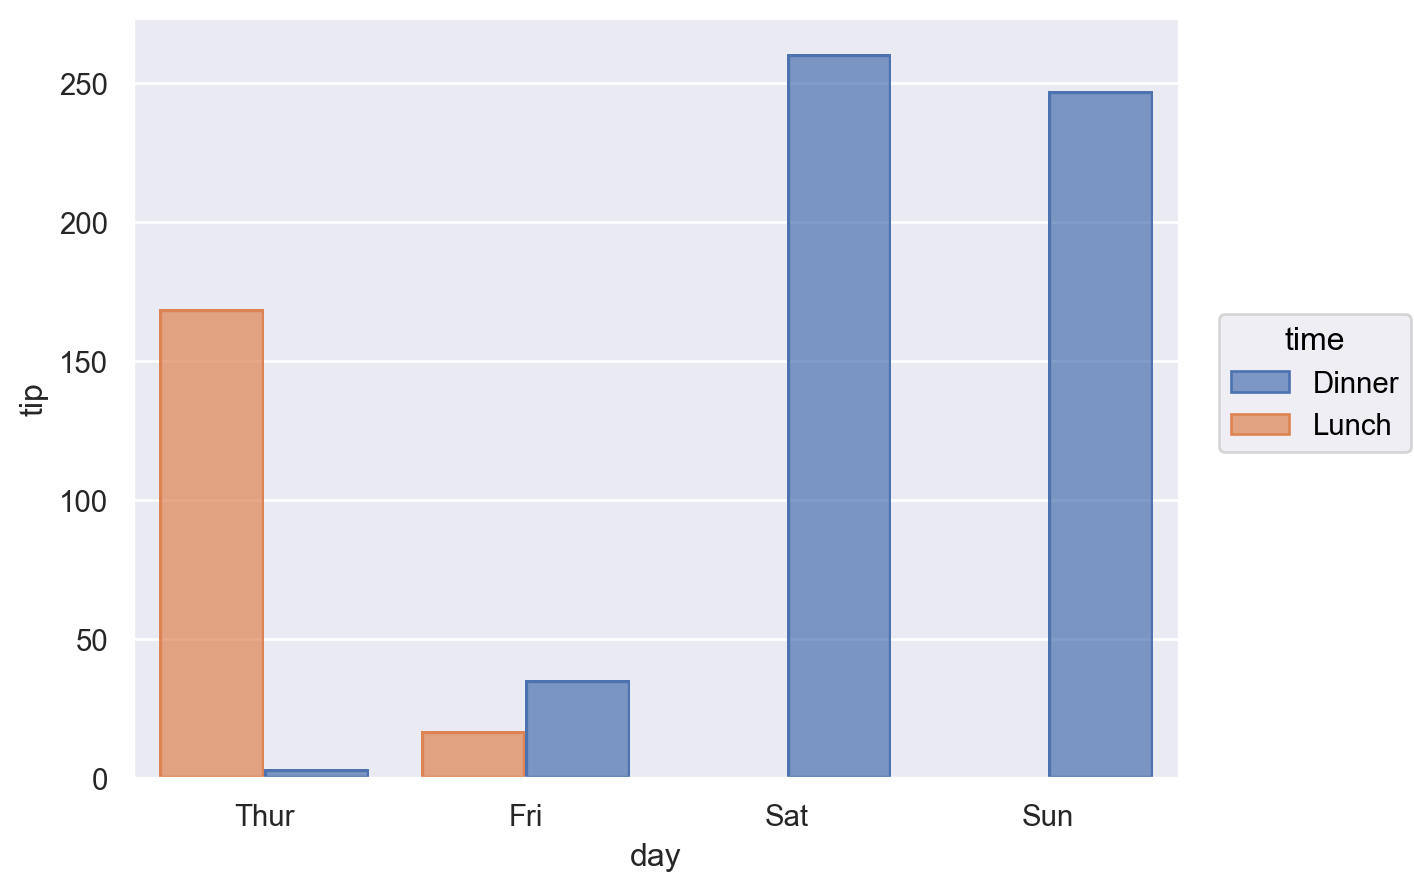

In [13]:
import seaborn as sns
import seaborn.objects as so

tips = sns.load_dataset('tips')

(
    so.Plot (data = tips, x= "day", y= "tip", color = "time")
    .add(so.Bar(),so.Agg("sum"),so.Dodge())
)

In [17]:
import seaborn as sns


penguins = sns.load_dataset('penguins')

penguinsClean = penguins.dropna().reset_index(drop= True).add_prefix("pinguinos_")


In [30]:
columnas = ["IMPO_1","IMPO_2","IMPO_3","EXPO_1","EXPO_2"]

data = pd.DataFrame(columns= columnas)

data_impo = data[[col for col in data.columns if col.startswith("IMPO")]]

data_impo2 = data.filter(like= "IMPO")

In [38]:
n,p = 100, 5

data = pd.DataFrame({"var%i" % i: np.random.uniform(-i,i,n) for i in range (1,p+1)})
data

,var1,var2,var3,var4,var5
0,-0.100846,1.592010,-1.175515,1.037708,-4.854838
1,0.113388,-1.457287,2.986474,-3.951350,3.236398
2,-0.676937,-0.137095,-0.547226,3.437473,-1.799997
3,0.045663,-0.541760,1.483071,-1.814968,4.175732
4,0.988273,-1.617690,-0.251066,-1.657328,-4.687572
...,...,...,...,...,...
95,0.736739,0.386853,-0.997402,-0.114709,-4.722088
96,-0.740193,-1.582258,2.661328,-1.850652,-3.021579
97,0.825556,-1.833933,2.860127,-2.020730,-1.252828
98,0.388433,-0.793079,-1.261266,-1.976942,-4.858550


In [39]:
def escalar(s,high=1,low=0):

    minimo, maximo = s.min(), s.max()

    return low + (s - minimo) / (maximo - minimo) * (high - low)

data = data.apply(escalar,high=5)

data = data.aggregate(["min","max"])

data

,var1,var2,var3,var4,var5
min,0.0,0.0,0.0,0.0,0.0
max,5.0,5.0,5.0,5.0,5.0


In [43]:
data_scaled = MinMaxScaler(feature_range=(0,5)).fit_transform(data)
data_Parcial = pd.DataFrame(data_scaled).aggregate(["min","max"]).rename(columns= {0:"var1",1:"var2",2:"var3",3:"var4",4:"var5"})
data_Parcial


,var1,var2,var3,var4,var5
min,0.0,0.0,0.0,0.0,0.0
max,5.0,5.0,5.0,5.0,5.0


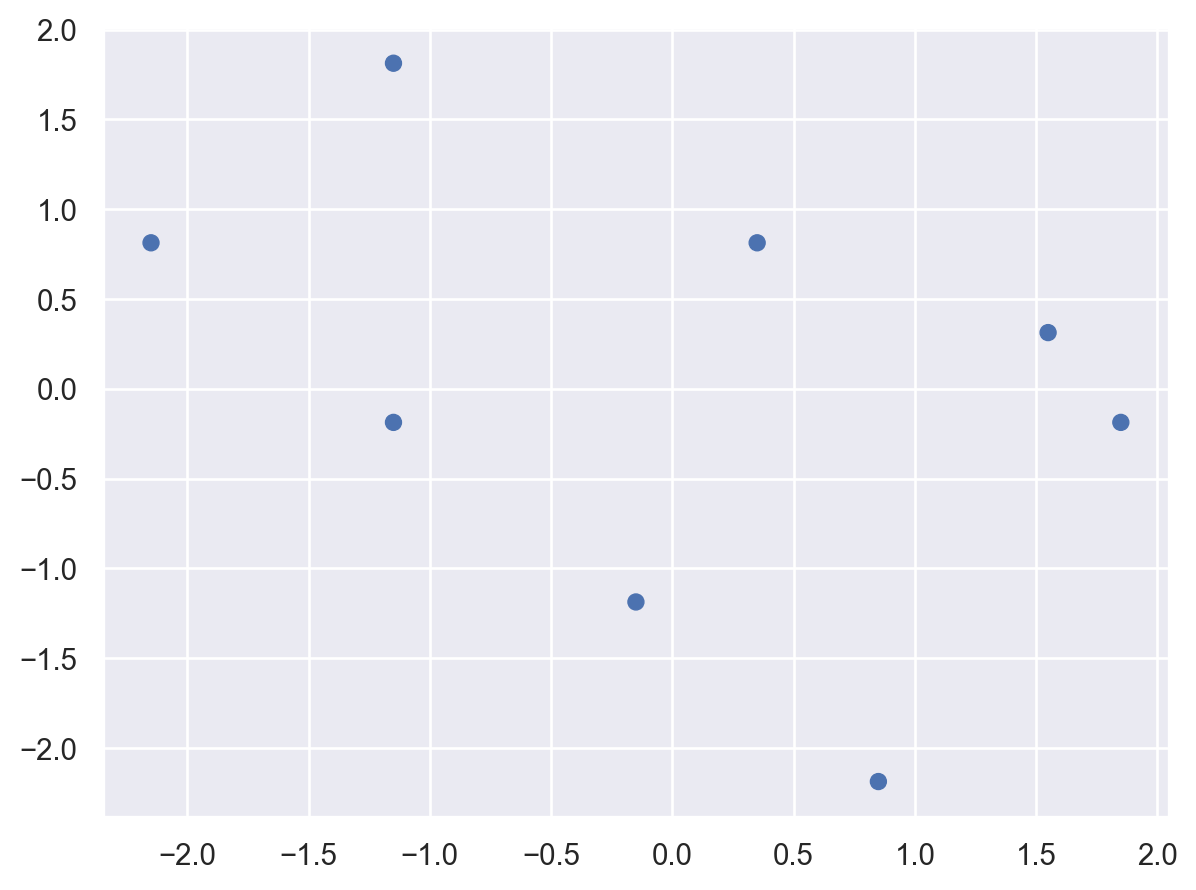

In [44]:
X = np.array([[1, 2], [2, -1], [3, -2], [4, 0], [2.5, 1], [3.7, 0.5], [1,0], [0,1]])
X_star = X - X.mean(axis = 0)
(
 so.Plot()
 .add(so.Dot(), x = X_star[:,0], y = X_star[:,1])
)

In [49]:
pca = PCA(n_components= 1).fit(X_star)
pca2 = pca.components_[0]
pca2 * (-1)

array([ 0.80414613, -0.59443167])

In [57]:
res = pca.transform(X_star).round(2).T
res

array([[ 2.  , -0.59, -1.98, -1.6 ,  0.2 , -1.06,  0.81,  2.21],
       [-0.77,  1.04,  1.25, -0.95, -0.86, -1.17,  0.83,  0.62]])

In [64]:
import seaborn as sns


tips = sns.load_dataset('tips')

tips["client_bill"] = tips.total_bill / tips["size"]
tips["lt_10"] = (tips.client_bill < 10).astype(int)

tips

,total_bill,tip,sex,smoker,day,time,size,client_bill,lt_10
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,1
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,1
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,1
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000,0
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.676667,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000,0
242,17.82,1.75,Male,No,Sat,Dinner,2,8.910000,1


In [69]:
import seaborn as sns


tips = sns.load_dataset('tips')

tips["day_avg"] = tips.groupby("day").total_bill.transform("mean")


In [76]:
from gapminder import gapminder

gap_1997 = gapminder[gapminder["year"] == 1997]

gdp_1997 = gap_1997["gdpPercap"]
pop_1997 = gap_1997["pop"]

GDP = gdp_1997 * pop_1997

GDP.median()

37473838314.64542